In [3]:
!python --version

Python 3.13.2


In [11]:
from dotenv import load_dotenv
load_dotenv()


True

In [19]:
import os
from datetime import datetime
from langchain_openai import ChatOpenAI

query = "Which pitcher is better for latte art? Mine has a rounded spout, but should the spout be sharper?"

llm = ChatOpenAI(model= 'gpt-4o')

result = llm.invoke(query)

print(result.content)

save_dir = "results"

os.makedirs(save_dir, exist_ok=True)

filename = f"{datetime.now().isoformat()}-result.md"
save_path = os.path.join(save_dir, filename)

# save
with open(save_path, "a", encoding="utf-8") as f:
    f.write(f"**Questions** \n {query}\n")
    f.write("\n")
    f.write(f"**Answer** \n {result.content}\n\n")

# 이게 랭체인으로 했던 방법임.

When choosing a pitcher for latte art, the spout design is an important factor to consider. A sharper or more tapered spout generally provides better control over the milk flow, which is essential for creating detailed and intricate patterns. This is because a sharper spout allows you to more precisely control the stream of milk, making it easier to draw fine lines and complex designs.

While rounded spouts can be used for latte art, they are often better suited for simpler designs, as they don't provide the same level of control. If your goal is to improve your latte art skills and create more intricate patterns, you might want to try a pitcher with a sharper spout.

Additionally, other factors such as the size and shape of the pitcher, the handle, and your personal comfort with it also play roles in your success with latte art. Many baristas find that experimenting with different pitchers helps them find the one that best suits their style and technique.


In [ ]:
# 랭그래프
# State, Node, Edge, Conditional Edge

In [25]:
!pip show langgraph


Name: langgraph
Version: 0.2.60
Summary: Building stateful, multi-actor applications with LLMs
Home-page: https://www.github.com/langchain-ai/langgraph
Author: 
Author-email: 
License: MIT
Location: /Users/hyeyeonkim/MayLangChainLangGraphMCP/.venv/lib/python3.13/site-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-sdk
Required-by: 


In [27]:
# State
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [28]:
# Graph builder
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [29]:
# Node

def generate(state:AgentState) -> AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages' : [ai_message]}

In [31]:
from langgraph.graph import START, END
# graph_builder.add_node('generate', generate) # <langgraph.graph.state.StateGraph at 0x11eb723c0>
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [32]:
# Edge

graph = graph_builder.compile()

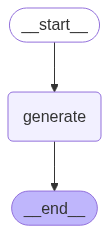

In [34]:
# mermaid

from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(content=query)]}
graph.invoke(initial_state)

BadRequestError: Error code: 400 - {'error': {'message': "Invalid 'messages': empty array. Expected an array with minimum length 1, but got an empty array instead.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'empty_array'}}